# MACE 2025 - SVM

## Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

# Linear SVM

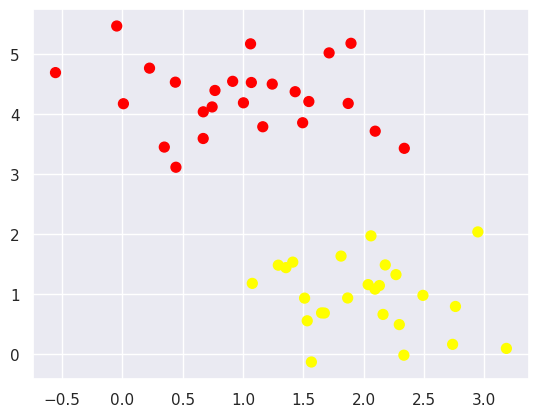

In [16]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")

In [6]:
Y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

### Function SVC - Linear

In [23]:
from sklearn.svm import SVC

model=SVC(kernel="linear", C = 0.01)
model.fit(X,Y)

w = model.coef_
b= model.intercept_
w, b
model.support_vectors_

array([[1.43289271, 4.37679234],
       [1.87271752, 4.18069237],
       [1.06923853, 4.53068484],
       [1.4949318 , 3.85848832],
       [1.1641107 , 3.79132988],
       [0.74387399, 4.12240568],
       [0.44359863, 3.11530945],
       [0.91433877, 4.55014643],
       [2.33812285, 3.43116792],
       [0.67047877, 4.04094275],
       [2.09680487, 3.7174206 ],
       [1.24258802, 4.50399192],
       [0.00793137, 4.17614316],
       [0.669787  , 3.59540802],
       [1.54632313, 4.212973  ],
       [1.00372519, 4.19147702],
       [0.3471383 , 3.45177657],
       [0.76752279, 4.39759671],
       [1.41281595, 1.5303347 ],
       [1.81336135, 1.6311307 ],
       [2.09517785, 1.0791468 ],
       [2.06156753, 1.96918596],
       [2.03835818, 1.15466278],
       [1.53278923, 0.55035386],
       [1.67467427, 0.68001896],
       [2.26908736, 1.32160756],
       [1.5108885 , 0.9288309 ],
       [1.65179125, 0.68193176],
       [2.49272186, 0.97505341],
       [2.18023251, 1.48364708],
       [1.

(-0.41872382476349596, 5.754870487889891)

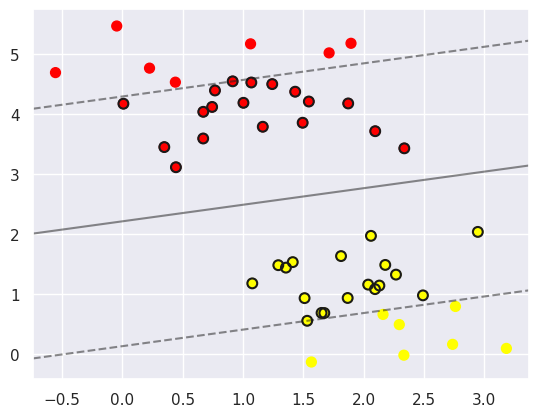

In [24]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

##Generamos la parrila de puntos para evaluar el modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
Y0, X0 = np.meshgrid(yy,xx)

xy = np.vstack([X0.ravel(), Y0.ravel()]).T
P = model.decision_function(xy).reshape(X0.shape)


##Representamos las fronteras y los márgenes del SVM
ax.contour(X0,Y0,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])

#Resaltamos los SV
SV = model.support_vectors_

ax.scatter(SV[:,0], SV[:,1], s=50, linewidth=1.5, facecolors = 'none', edgecolor='k')


ax.set_xlim(xlim)
ax.set_ylim(ylim)

## Non Linear SVM

In [25]:
from sklearn.datasets import make_circles

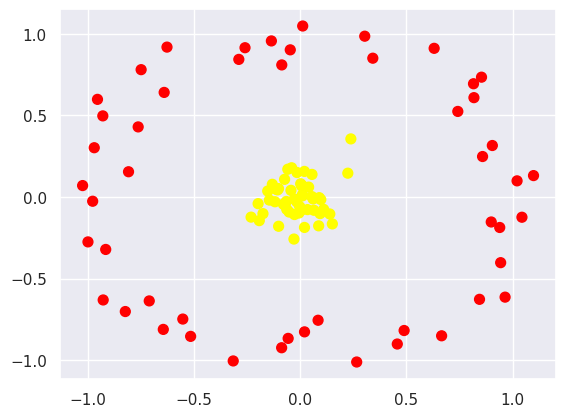

In [26]:
X, Y = make_circles(100, factor = .1, noise = .1)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

In [39]:
rbf = SVC(kernel="rbf", C=10**6, gamma=1)
rbf.fit(X,Y)
rbf.support_vectors_

array([[-0.80793332,  0.15504612],
       [ 0.0842307 , -0.75548182],
       [ 0.74185229,  0.52485163],
       [-0.08663599,  0.81002601],
       [ 0.85836565,  0.24838215],
       [-0.02939478, -0.25765656],
       [ 0.23847489,  0.35645086],
       [-0.23113943, -0.12326377]])

(-1.1144966850598725, 1.1516463129796273)

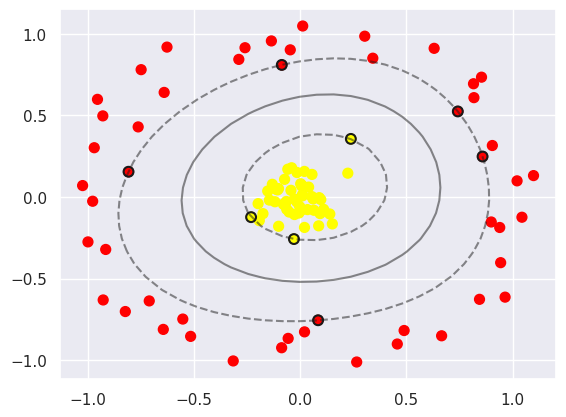

In [40]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

##Generamos la parrila de puntos para evaluar el modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
Y0, X0 = np.meshgrid(yy,xx)

xy = np.vstack([X0.ravel(), Y0.ravel()]).T
P = rbf.decision_function(xy).reshape(X0.shape)


##Representamos las fronteras y los márgenes del SVC
ax.contour(X0,Y0,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])

SV = rbf.support_vectors_
ax.scatter(SV[:,0], SV[:,1], s=50, linewidth=1.5, facecolors = 'none', edgecolor='k')


ax.set_xlim(xlim)
ax.set_ylim(ylim)

## Tuning SVM

In [45]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)



(-2.1911770189542707, 7.065474697949433)

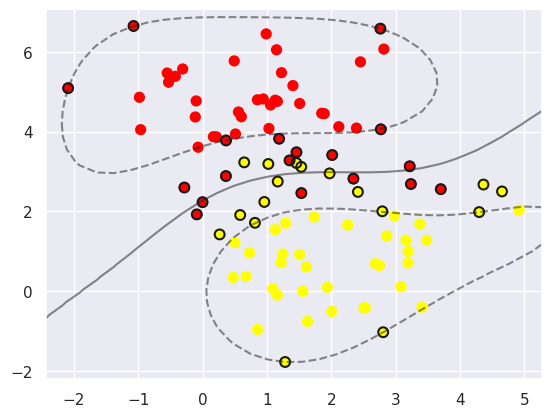

In [52]:

model = SVC(kernel="rbf", C=1)
model.fit(X,Y)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

##Generamos la parrila de puntos para evaluar el modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
Y0, X0 = np.meshgrid(yy,xx)

xy = np.vstack([X0.ravel(), Y0.ravel()]).T
P = model.decision_function(xy).reshape(X0.shape)


##Representamos las fronteras y los márgenes del SVC
ax.contour(X0,Y0,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])

SV = model.support_vectors_
ax.scatter(SV[:,0], SV[:,1], s=50, linewidth=1.5, facecolors = 'none', edgecolor='k')


ax.set_xlim(xlim)
ax.set_ylim(ylim)

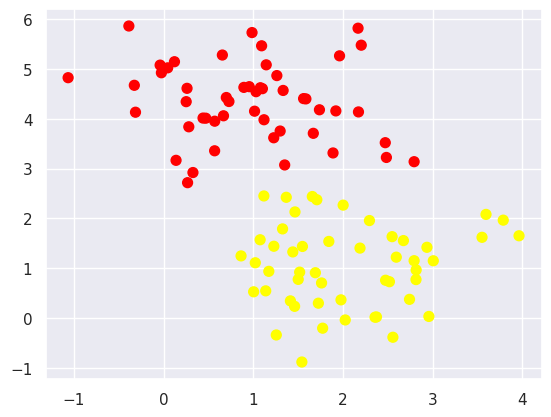

In [53]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

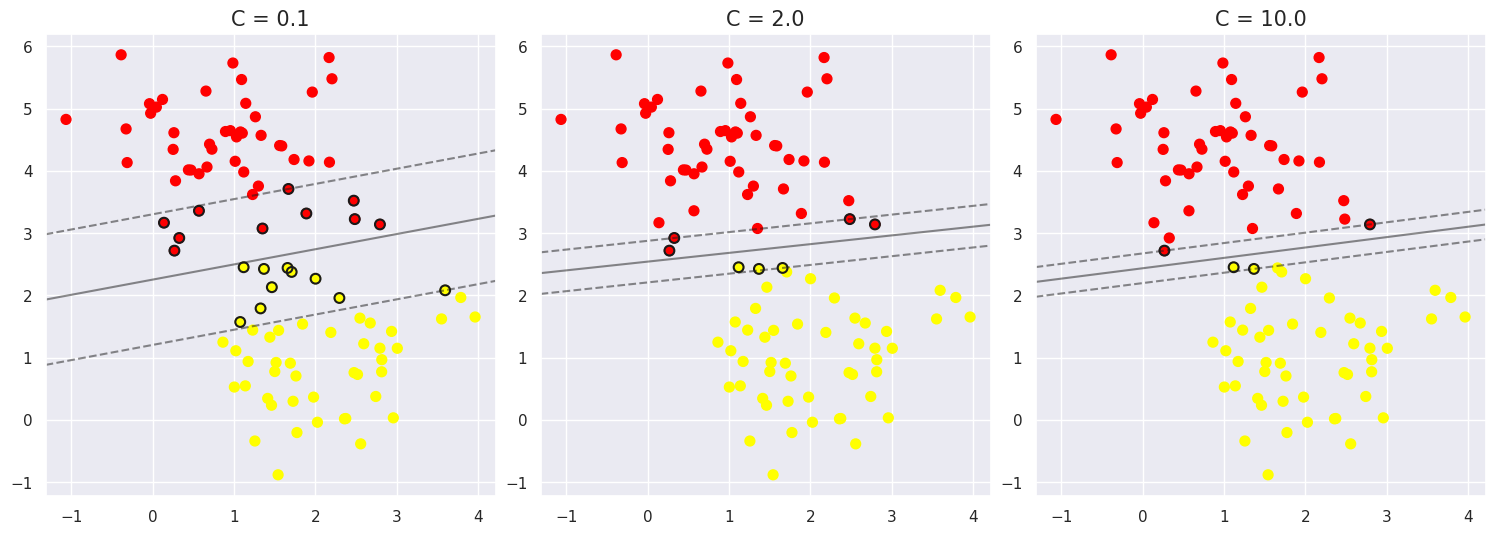

In [54]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [0.1, 2, 10]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")

    xlim = ax_i.get_xlim()
    ylim = ax_i.get_ylim()

    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y0, X0 = np.meshgrid(yy,xx)

    xy = np.vstack([X0.ravel(), Y0.ravel()]).T
    P = model.decision_function(xy).reshape(X0.shape)


    ##Representamos las fronteras y los márgenes del SVC
    ax_i.contour(X0,Y0,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])

    SV = model.support_vectors_
    ax_i.scatter(SV[:,0], SV[:,1], s=50, linewidth=1.5, facecolors = 'none', edgecolor='k')


    ax_i.set_xlim(xlim)
    ax_i.set_ylim(ylim)
    ax_i.set_title("C = %.1f"%C, size = 15)




### Accuracy

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [62]:
model = SVC(kernel='linear', C=10).fit(X_train, Y_train)
model.score(X_test,Y_test)

0.975

## Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score

model = SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(model, X, Y, cv=5)
scores, scores.mean(), scores.std()

(array([0.95, 1.  , 0.95, 1.  , 1.  ]),
 np.float64(0.9800000000000001),
 np.float64(0.024494897427831803))

In [74]:
model = SVC(kernel='linear', C=0.01)
model.fit(X_train, Y_train)


SVC(C=0.01, kernel='linear')

In [75]:
from sklearn.metrics import confusion_matrix
Ypred = model.predict(X_test)
Ypred


array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [76]:
confusion_matrix(Ypred, Y_test)

array([[18,  0],
       [ 1, 21]])

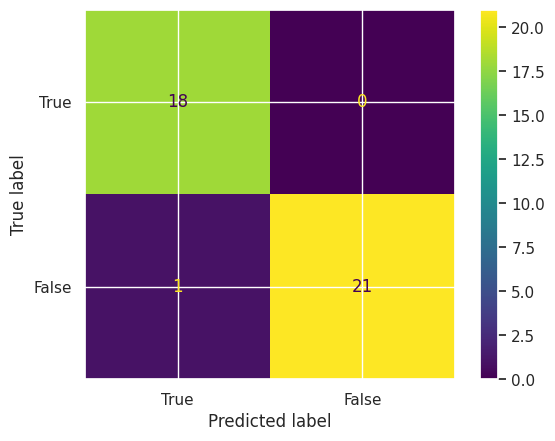

In [79]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Ypred, Y_test), display_labels = [True, False])

cm_display.plot()
plt.show()



In [81]:
CM = confusion_matrix(Y_test, Ypred)

TP= CM[0,0]
FP= CM[1,0]
FN = CM[0,1]
TN= CM[1,1]

print("Accuracy: ", (TP+TN)/(TP+TN+FP+FN))
print("Sensitivity: ", TP/(TP+FP))
print("Specificity: ", TN/(TN+FN))

Accuracy:  0.975
Sensitivity:  1.0
Specificity:  0.9545454545454546


## Multiclass Datasets

In [82]:
from sklearn import svm, datasets
iris = datasets.load_iris()

X = iris.data[:, :2]
Y = iris.target

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max - x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_plot = np.c_[xx.ravel(), yy.ravel()]

In [85]:
C = 100.0
model = svm.SVC(kernel="rbf", C=C, gamma=0.5, decision_function_shape="ovr").fit(X,Y)
Ypred = model.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVM Iris')

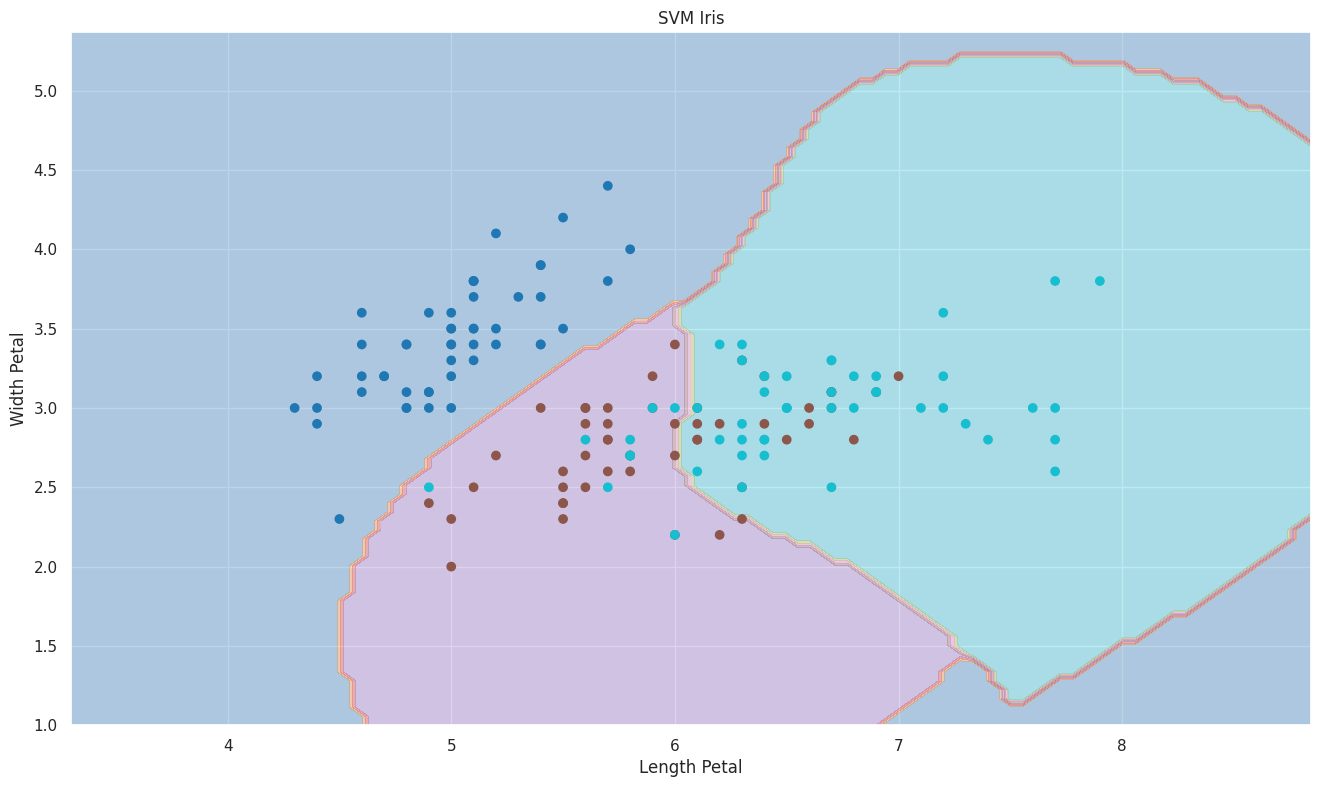

In [86]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Length Petal")
plt.ylabel("Width Petal")
plt.xlim(xx.min(), xx.max())
plt.title("SVM Iris")

In [ ]:
### Tuning Iris SVM

In [88]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [89]:
X, Y = shuffle(X,Y, random_state = 0)
parameters = [
    {
        'kernel': ['rbf'],
        'gamma' : [1e-4,1e-3,1e-2, 0.1, 0.2, 0.5],
        'C': [1,10,100,1000]
    },
    {
        'kernel':["linear"],
        'C':[1,10,100,1000]
    }
]

model = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5)
model.fit(X,Y)
model.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

### Face Recognition

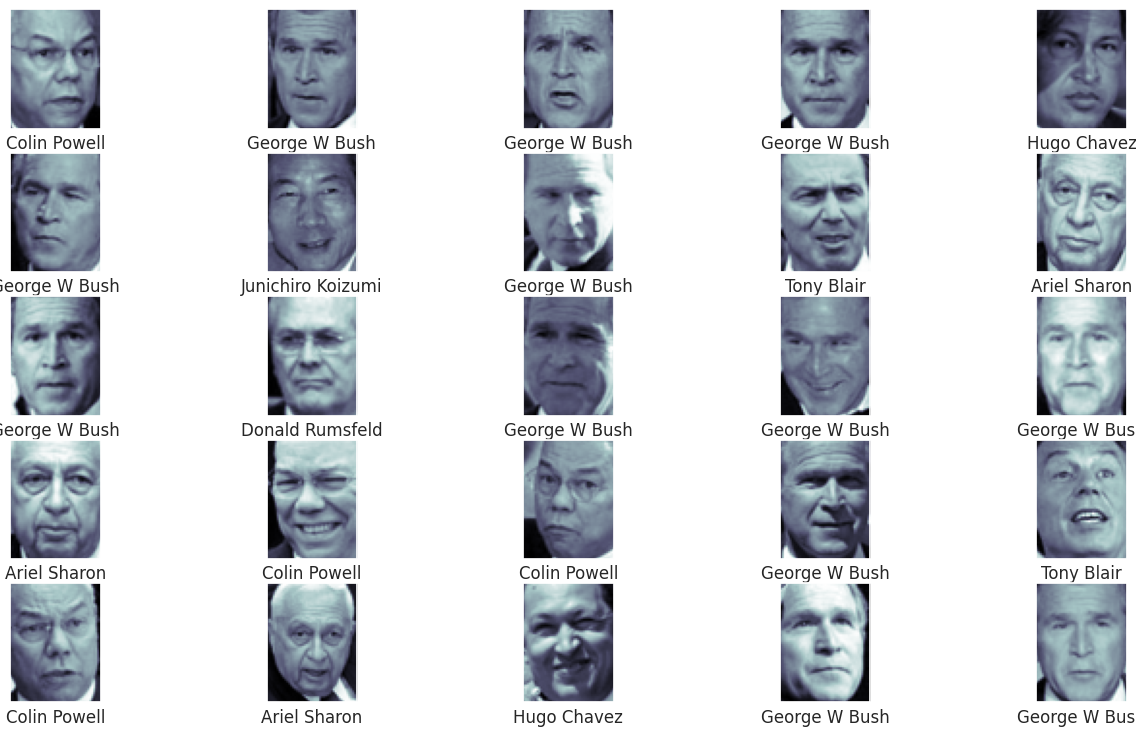

In [90]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [95]:


Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

parameters = {
    'kernel': ['rbf'],
    "C":[0.1,1,5,10,50],
    "gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01]
}
model = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5)
model.fit(Xtrain, Ytrain)
model.best_params_

{'C': 50, 'gamma': 0.0005, 'kernel': 'rbf'}

Text(0.5, 0.98, 'Wrong Predictions in red')

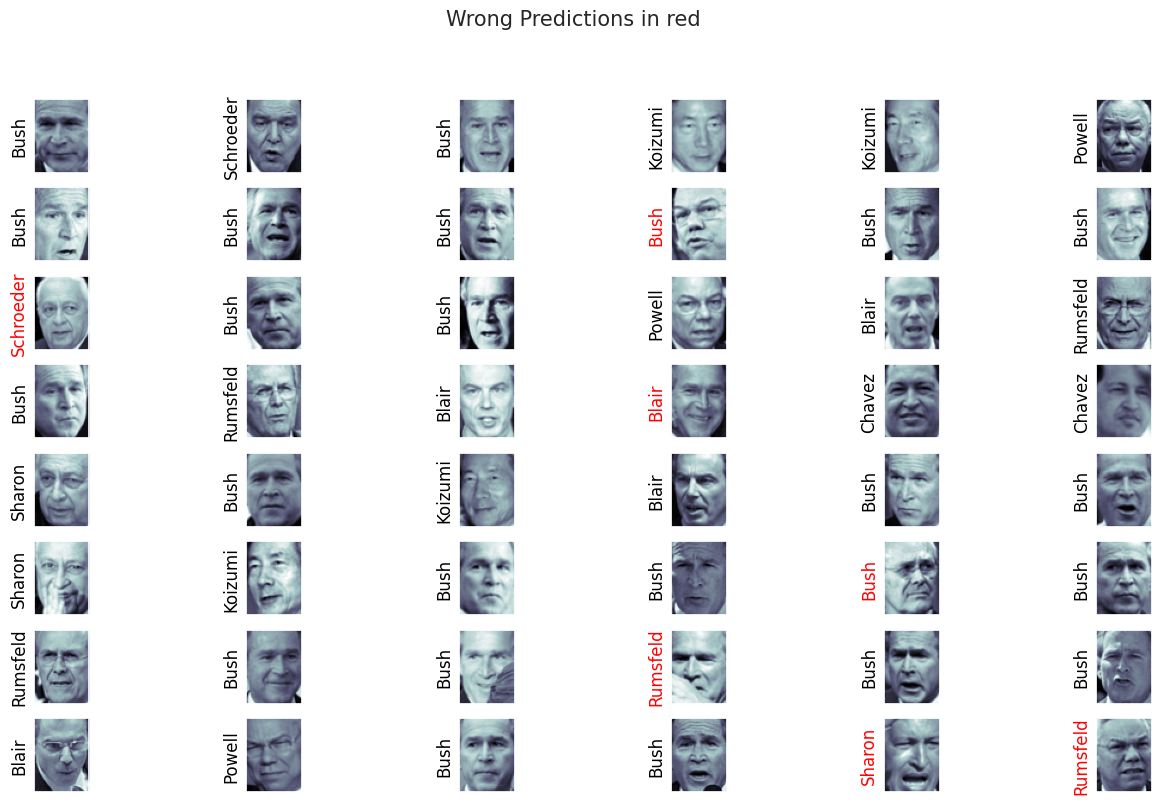

In [97]:
classifier = model.best_estimator_
yfit = classifier.predict(Xtest)
fig, ax = plt.subplots(8,6,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = "black" if yfit[i]==Ytest[i] else "red")

fig.suptitle("Wrong Predictions in red", size = 15)

<Axes: >

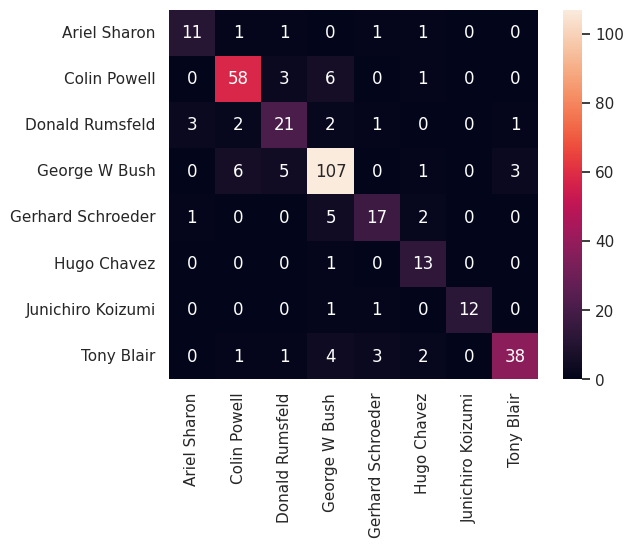

In [98]:
CM = confusion_matrix(Ytest, yfit)
sns.heatmap(CM.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=faces.target_names, yticklabels=faces.target_names )

In [100]:
Xtrain.shape, Xtest.shape

((1011, 2914), (337, 2914))